In [1]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/Mariduquec/Challenge_TelecomX_LATAM_P2/refs/heads/main/datos_tratados.csv'

df = pd.read_csv(github_url)
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.756242


In [4]:
# Eliminar la columna 'customerID'
df = df.drop('customerID', axis=1)

# Mostrar las primeras filas del DataFrame actualizado
display(df.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.155059
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.756242


In [5]:
# Verificar los tipos de datos de cada columna
display(df.info())

# Mostrar el número de valores únicos para cada columna para identificar posibles columnas a eliminar
display(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   int64  
 1   gender            7256 non-null   int64  
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   int64  
 4   Dependents        7256 non-null   int64  
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   int64  
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   int64  


None

,0
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [6]:
# Seleccionar las columnas de tipo 'object' (categóricas)
categorical_cols = df.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True evita la multicolinealidad

# Mostrar las primeras filas del DataFrame codificado y sus nuevas dimensiones
display(df_encoded.head())
display(f"Shape of the original DataFrame: {df.shape}")
display(f"Shape of the encoded DataFrame: {df_encoded.shape}")

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,...,TechSupport_Yes,StreamingTV_NoService,StreamingTV_Yes,StreamingMovies_NoService,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


'Shape of the original DataFrame: (7256, 21)'

'Shape of the encoded DataFrame: (7256, 32)'

In [7]:
# Calcular el número de clientes que cancelaron y los que no
churn_counts = df_encoded['Churn'].value_counts()

# Calcular la proporción de cada clase
churn_proportions = df_encoded['Churn'].value_counts(normalize=True) * 100

# Mostrar los resultados
display("Conteo de Clientes por Churn:")
display(churn_counts)

display("\nProporción de Clientes por Churn (%):")
display(churn_proportions)

# Evaluar si existe un desbalance significativo (ej. si una clase es menos del 20-30%)
if churn_proportions.min() < 30: # Umbral común para considerar desbalance
    display("\nObservación: Existe un posible desbalance de clases en la variable 'Churn'.")
else:
    display("\nObservación: La variable 'Churn' parece estar relativamente balanceada.")

'Conteo de Clientes por Churn:'

,count
Churn,
0,5387
1,1869


'\nProporción de Clientes por Churn (%):'

,proportion
Churn,
0,74.242007
1,25.757993


"\nObservación: Existe un posible desbalance de clases en la variable 'Churn'."

Primero, separamos las características (X) de la variable objetivo (y).

In [8]:
# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

display("Características (X):")
display(X.head())
display("\nVariable Objetivo (y):")
display(y.head())

'Características (X):'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_NoService,StreamingTV_Yes,StreamingMovies_NoService,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.155059,...,True,False,True,False,False,True,False,False,False,True
1,1,0,0,0,9,1,0,59.9,542.40,1.967806,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.427727,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.219448,...,False,False,True,False,True,False,False,False,True,False
4,0,1,1,0,3,1,1,83.9,267.40,2.756242,...,True,False,True,False,False,False,False,False,False,True


'\nVariable Objetivo (y):'

,Churn
0,0
1,0
2,1
3,1
4,1


Ahora, aplicaremos SMOTE para balancear la distribución de la variable objetivo. Necesitaremos instalar la librería `imbalanced-learn`.

In [9]:
%pip install imbalanced-learn -q

Aplicamos SMOTE a las características (X) y la variable objetivo (y).

In [10]:
from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE a los datos
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de la variable objetivo
display("Conteo de Clientes por Churn después de SMOTE:")
display(y_resampled.value_counts())

display("\nProporción de Clientes por Churn después de SMOTE (%):")
display(y_resampled.value_counts(normalize=True) * 100)

display(f"\nShape of X before SMOTE: {X.shape}")
display(f"Shape of X after SMOTE: {X_resampled.shape}")

'Conteo de Clientes por Churn después de SMOTE:'

,count
Churn,
0,5387
1,5387


'\nProporción de Clientes por Churn después de SMOTE (%):'

,proportion
Churn,
0,50.0
1,50.0


'\nShape of X before SMOTE: (7256, 31)'

'Shape of X after SMOTE: (10774, 31)'

Ahora, vamos a estandarizar las características numéricas. Identificaremos las columnas numéricas y aplicaremos `StandardScaler`.

In [11]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas (excluyendo la variable objetivo 'Churn' si aún estuviera en X_resampled)
# Ya la separamos previamente, pero es bueno asegurarse. Las columnas booleanas creadas por get_dummies no necesitan escalado.
numerical_cols = X_resampled.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar StandardScaler a las columnas numéricas en el DataFrame resampleado
# Mantener el DataFrame original para las columnas no numéricas (booleanas de one-hot encoding)
X_resampled_scaled_numerical = scaler.fit_transform(X_resampled[numerical_cols])

# Convertir el array escalado de vuelta a un DataFrame y mantener los nombres de columna
X_resampled_scaled_numerical_df = pd.DataFrame(X_resampled_scaled_numerical, columns=numerical_cols)

# Concatenar las columnas numéricas escaladas con las columnas categóricas (booleanas) que no necesitan escalado
# Asegurarse de que los índices coincidan, lo cual SMOTE mantiene.
X_resampled_processed = pd.concat([X_resampled_scaled_numerical_df, X_resampled.select_dtypes(include='bool')], axis=1)


display("Características (X) después de Estandarización:")
display(X_resampled_processed.head())
display(f"Shape of X after Scaling: {X_resampled_processed.shape}")

'Características (X) después de Estandarización:'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_NoService,StreamingTV_Yes,StreamingMovies_NoService,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.867762,-0.395450,1.284437,1.910492,-0.776635,0.338739,0.819405,-0.088536,-0.664596,-0.088536,...,True,False,True,False,False,True,False,False,False,True
1,1.152390,-0.395450,-0.778551,-0.523425,-0.776635,0.338739,-1.220398,-0.287055,-0.687875,-0.287055,...,False,False,False,False,True,False,False,False,False,True
2,1.152390,-0.395450,-0.778551,-0.523425,-0.985416,0.338739,0.819405,0.200536,-0.807497,0.200536,...,False,False,False,False,False,False,False,False,True,False
3,1.152390,2.528764,1.284437,-0.523425,-0.609610,0.338739,0.819405,1.039888,-0.369806,1.039888,...,False,False,True,False,True,False,False,False,True,False
4,-0.867762,2.528764,1.284437,-0.523425,-1.027173,0.338739,0.819405,0.548815,-0.813649,0.548815,...,True,False,True,False,False,False,False,False,False,True


'Shape of X after Scaling: (10774, 31)'

Vamos a calcular la matriz de correlación para identificar las relaciones entre las variables, incluyendo la correlación con la variable objetivo `Churn`.

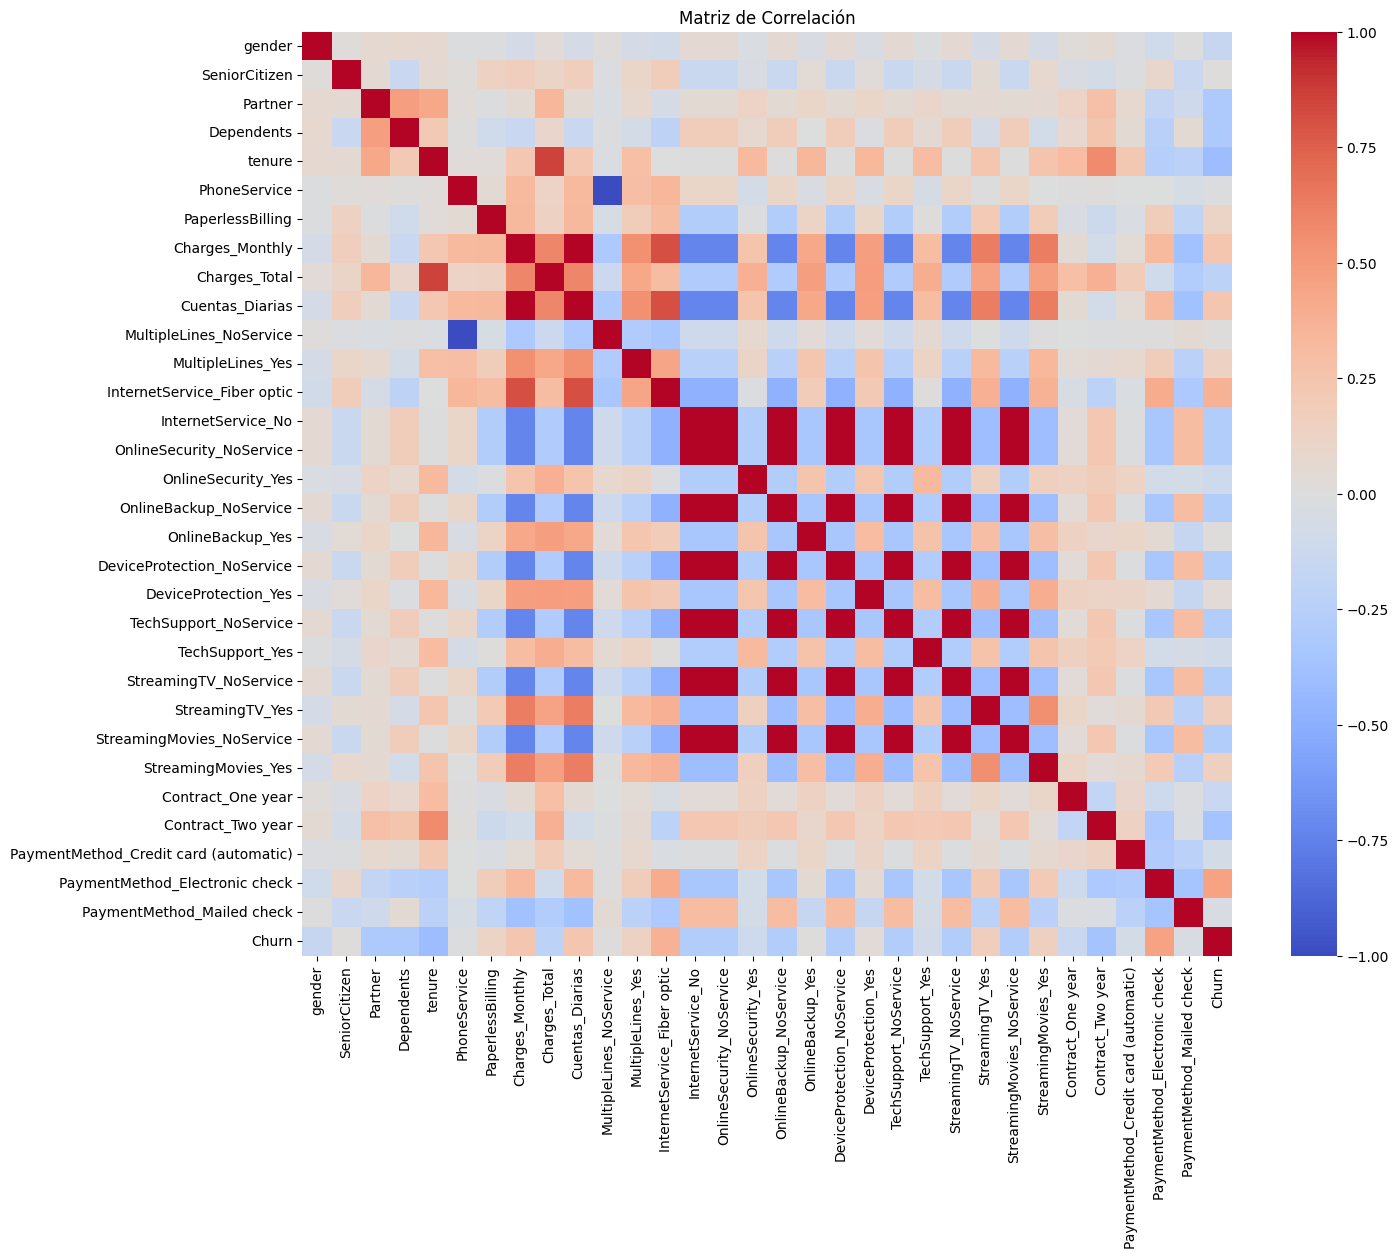

'\nCorrelación con la variable Churn:'

,Churn
Churn,1.000000
PaymentMethod_Electronic check,0.458554
InternetService_Fiber optic,0.374671
Cuentas_Diarias,0.234990
Charges_Monthly,0.234990
StreamingTV_Yes,0.164806
StreamingMovies_Yes,0.155657
MultipleLines_Yes,0.146727
PaperlessBilling,0.119276
DeviceProtection_Yes,0.035418


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame combinado para calcular la correlación, incluyendo la variable objetivo
# Asegurarse de que los índices coincidan
df_balanced_processed = pd.concat([X_resampled_processed, y_resampled], axis=1)


# Calcular la matriz de correlación
correlation_matrix = df_balanced_processed.corr()

# Visualizar la matriz de correlación (usando un mapa de calor)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Puedes poner annot=True para ver los valores, pero puede ser abrumador con muchas columnas
plt.title('Matriz de Correlación')
plt.show()

# Opcional: Mostrar solo la correlación con la variable objetivo 'Churn'
display("\nCorrelación con la variable Churn:")
display(correlation_matrix['Churn'].sort_values(ascending=False))

Vamos a visualizar la relación entre algunas variables clave y la cancelación (`Churn`) utilizando boxplots y gráficos de barras.

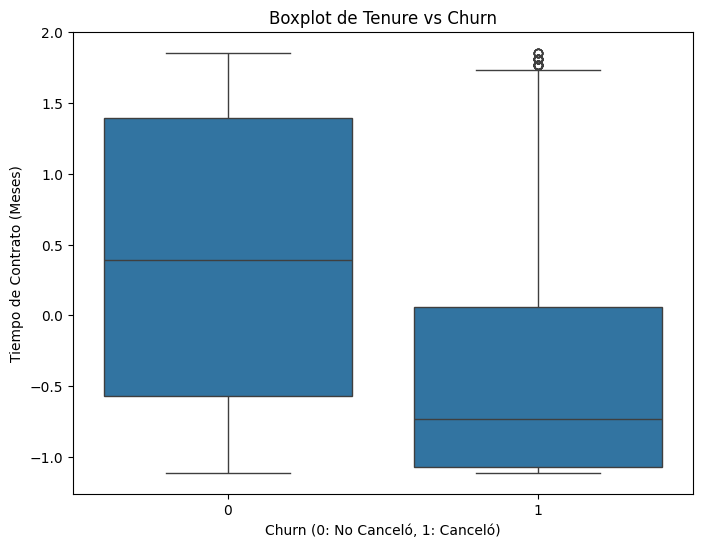

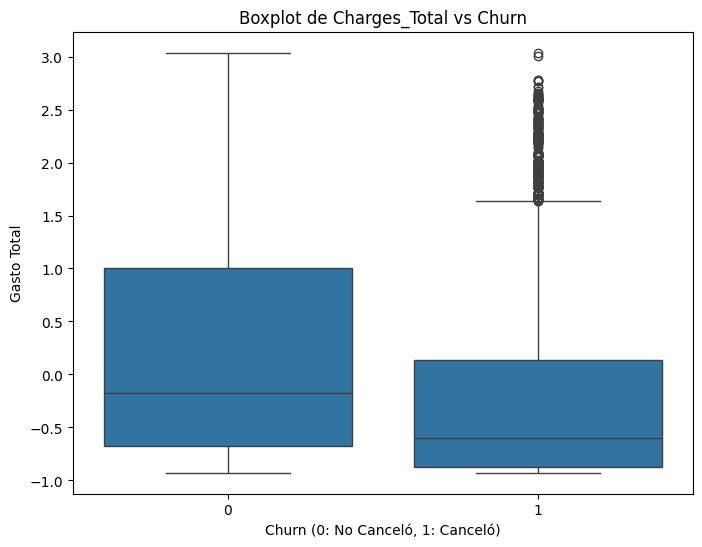

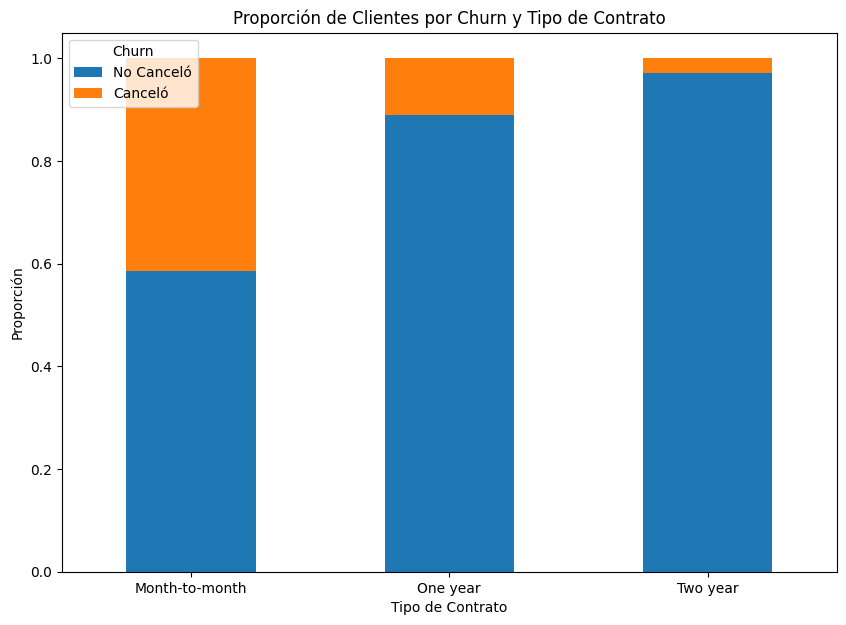

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que 'Churn' sea una variable categórica para los boxplots
df_balanced_processed['Churn'] = df_balanced_processed['Churn'].astype('category')

# Boxplot para 'tenure' vs 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_balanced_processed)
plt.title('Boxplot de Tenure vs Churn')
plt.xlabel('Churn (0: No Canceló, 1: Canceló)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.show()

# Boxplot para 'Charges_Total' vs 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges_Total', data=df_balanced_processed)
plt.title('Boxplot de Charges_Total vs Churn')
plt.xlabel('Churn (0: No Canceló, 1: Canceló)')
plt.ylabel('Gasto Total')
plt.show()

# Para 'Contract', que es categórica original, usaremos el DataFrame original o recodificaremos
# Usaremos el DataFrame original para visualizar las categorías originales del contrato
# Si queremos usar df_balanced_processed, necesitaríamos agrupar por las columnas codificadas de contrato.
# Es más intuitivo usar el DataFrame original para visualizar la relación con el tipo de contrato.

# Vamos a usar el DataFrame original 'df' para visualizar la relación de 'Contract' con 'Churn'
# Necesitamos asegurarnos de que 'Churn' en df también sea numérico o categórico
df['Churn'] = df['Churn'].astype('category')

# Calcular la proporción de churn por tipo de contrato
contract_churn_proportion = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras para la proporción de Churn por tipo de contrato
contract_churn_proportion.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Proporción de Clientes por Churn y Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (ej. 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_processed, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Mostrar las dimensiones de los conjuntos resultantes
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

# Verificar la proporción de clases en los conjuntos de entrenamiento y prueba (debería ser similar debido a stratify)
display("\nProporción de Churn en y_train (%):")
display(y_train.value_counts(normalize=True) * 100)

display("\nProporción de Churn en y_test (%):")
display(y_test.value_counts(normalize=True) * 100)

'Shape of X_train:'

(7541, 31)

'Shape of X_test:'

(3233, 31)

'Shape of y_train:'

(7541,)

'Shape of y_test:'

(3233,)

'\nProporción de Churn en y_train (%):'

,proportion
Churn,
1,50.00663
0,49.99337


'\nProporción de Churn en y_test (%):'

,proportion
Churn,
0,50.015466
1,49.984534


Vamos a entrenar dos modelos de clasificación: Regresión Logística y Random Forest.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inicializar los modelos
# Para Regresión Logística, los datos escalados son apropiados.
# Para Random Forest, el escalado no es estrictamente necesario, pero no perjudica.
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Usamos 'liblinear' para conjuntos de datos pequeños/medianos
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo de Regresión Logística
print("Entrenando modelo de Regresión Logística...")
log_reg_model.fit(X_train, y_train)
print("Entrenamiento de Regresión Logística completado.")

# Entrenar el modelo de Random Forest
print("\nEntrenando modelo de Random Forest...")
rf_model.fit(X_train, y_train)
print("Entrenamiento de Random Forest completado.")

print("\nModelos entrenados y listos para la evaluación.")

Entrenando modelo de Regresión Logística...
Entrenamiento de Regresión Logística completado.

Entrenando modelo de Random Forest...
Entrenamiento de Random Forest completado.

Modelos entrenados y listos para la evaluación.


Ahora, evaluaremos el rendimiento de los modelos entrenados utilizando métricas comunes de clasificación.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# --- Evaluación del modelo de Regresión Logística ---
print("--- Evaluación del Modelo de Regresión Logística ---")

# Realizar predicciones en el conjunto de prueba
y_pred_lr = log_reg_model.predict(X_test)

# Calcular métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Mostrar métricas
print(f"Exactitud (Accuracy): {accuracy_lr:.4f}")
print(f"Precisión (Precision): {precision_lr:.4f}")
print(f"Recall (Sensibilidad): {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_lr)

# Mostrar reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))


print("\n" + "="*50 + "\n") # Separador

# --- Evaluación del modelo de Random Forest ---
print("--- Evaluación del Modelo de Random Forest ---")

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Mostrar métricas
print(f"Exactitud (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión (Precision): {precision_rf:.4f}")
print(f"Recall (Sensibilidad): {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_rf)

# Mostrar reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

--- Evaluación del Modelo de Regresión Logística ---
Exactitud (Accuracy): 0.8092
Precisión (Precision): 0.8116
Recall (Sensibilidad): 0.8051
F1-score: 0.8083

Matriz de Confusión:


array([[1315,  302],
       [ 315, 1301]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1617
           1       0.81      0.81      0.81      1616

    accuracy                           0.81      3233
   macro avg       0.81      0.81      0.81      3233
weighted avg       0.81      0.81      0.81      3233



--- Evaluación del Modelo de Random Forest ---
Exactitud (Accuracy): 0.8410
Precisión (Precision): 0.8385
Recall (Sensibilidad): 0.8447
F1-score: 0.8416

Matriz de Confusión:


array([[1354,  263],
       [ 251, 1365]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1617
           1       0.84      0.84      0.84      1616

    accuracy                           0.84      3233
   macro avg       0.84      0.84      0.84      3233
weighted avg       0.84      0.84      0.84      3233



Ahora, vamos a analizar la importancia de las variables para cada modelo entrenado.

In [17]:
# --- Análisis de Coeficientes para Regresión Logística ---
print("--- Coeficientes del Modelo de Regresión Logística ---")

# Obtener los nombres de las características
feature_names = X_train.columns

# Obtener los coeficientes del modelo
# Si el modelo tiene intercepto, el primer coeficiente es el del intercepto (si solver='liblinear')
# Si usamos fit_intercept=True (por defecto), el intercepto está en model.intercept_
# Los coeficientes de las características están en model.coef_[0] para clasificación binaria
coefficients = log_reg_model.coef_[0]

# Crear un DataFrame para visualizar coeficientes y nombres de características
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar por valor absoluto del coeficiente para ver los más importantes
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

display(coef_df_sorted)

print("\nInterpretación: Los coeficientes con mayor valor absoluto indican una mayor influencia en la probabilidad de Churn. Un coeficiente positivo aumenta la probabilidad de Churn, uno negativo la disminuye.")


print("\n" + "="*50 + "\n") # Separador


# --- Análisis de Importancia de Características para Random Forest ---
print("--- Importancia de Características del Modelo Random Forest ---")

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar importancia y nombres de características
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia de mayor a menor
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

display(feature_importances_df_sorted)

print("\nInterpretación: Las características con mayor valor de 'Importance' son consideradas más relevantes por el modelo Random Forest para predecir Churn.")

--- Coeficientes del Modelo de Regresión Logística ---


,Feature,Coefficient
12,InternetService_Fiber optic,4.685267
7,Charges_Monthly,-2.185694
9,Cuentas_Diarias,-2.185694
4,tenure,-1.826897
23,StreamingTV_Yes,1.818877
25,StreamingMovies_Yes,1.663424
29,PaymentMethod_Electronic check,1.463521
11,MultipleLines_Yes,1.380059
30,PaymentMethod_Mailed check,0.979060
8,Charges_Total,0.972913



Interpretación: Los coeficientes con mayor valor absoluto indican una mayor influencia en la probabilidad de Churn. Un coeficiente positivo aumenta la probabilidad de Churn, uno negativo la disminuye.


--- Importancia de Características del Modelo Random Forest ---


,Feature,Importance
4,tenure,0.144563
8,Charges_Total,0.136324
9,Cuentas_Diarias,0.106967
7,Charges_Monthly,0.106479
29,PaymentMethod_Electronic check,0.092041
12,InternetService_Fiber optic,0.050980
27,Contract_Two year,0.036877
2,Partner,0.032354
3,Dependents,0.029361
0,gender,0.022262



Interpretación: Las características con mayor valor de 'Importance' son consideradas más relevantes por el modelo Random Forest para predecir Churn.


## Informe detallado y conclusión estratégica

Basándonos en el análisis exhaustivo de los datos de clientes de TelecomX, que incluyó preprocesamiento (codificación, balanceo con SMOTE, escalado), visualización, análisis de correlación y modelado predictivo, hemos identificado varios factores clave que influyen en la cancelación de clientes (Churn).

**Análisis de Correlación y Visualización:**

El análisis de la matriz de correlación y la visualización de la relación entre variables específicas y Churn revelaron que:

*   El **tiempo de contrato (tenure)** y el **gasto total (Charges_Total)** mostraron una correlación negativa con Churn, indicando que los clientes con menor tiempo de servicio y menor gasto total son más propensos a cancelar.
*   El **tipo de contrato** es un factor muy relevante, con los clientes que tienen contratos **mes a mes** presentando una tasa de cancelación significativamente más alta en comparación con aquellos con contratos de uno o dos años.
*   El **servicio de internet de fibra óptica** y el **método de pago cheque electrónico** mostraron una correlación positiva con Churn.

**Importancia de Variables en los Modelos Predictivos:**

Tanto el modelo de Regresión Logística (analizando coeficientes) como el modelo de Random Forest (analizando importancia de características) coincidieron en la relevancia de varias variables clave:

*   **Tenure:** Consistentemente identificada como una de las variables más importantes.
*   **Variables de Gasto (Charges_Monthly, Charges_Total, Cuentas_Diarias):** Consideradas relevantes por ambos modelos.
*   **Tipo de Servicio de Internet (Fiber optic):** Destacada por ambos modelos, especialmente por Regresión Logística.
*   **Método de Pago (Electronic check):** También una variable influyente según ambos modelos.
*   **Tipo de Contrato:** Los contratos a largo plazo (`Contract_One year`, `Contract_Two year`) tienen un impacto negativo significativo en la probabilidad de Churn.

**Rendimiento del Modelo:**

Ambos modelos de clasificación (Regresión Logística y Random Forest) tuvieron un buen desempeño en la predicción de Churn en el conjunto de prueba después de aplicar técnicas de balanceo. El modelo de **Random Forest** mostró un rendimiento ligeramente superior en las métricas de Accuracy, Precision, Recall y F1-score.

**Principales Factores que Afectan la Cancelación:**

Con base en el análisis de datos y los modelos predictivos, los principales impulsores de la cancelación de clientes son:

1.  **Ciclo de Vida del Cliente (Tenure y Tipo de Contrato):** Los clientes en las primeras etapas de su relación con la compañía (baja tenure) y aquellos sin compromiso a largo plazo (contratos mes a mes) son los más vulnerables a la cancelación.
2.  **Características del Servicio (Fibra Óptica):** La asociación entre el servicio de fibra óptica y una mayor tasa de cancelación sugiere posibles problemas de satisfacción o competitividad en este segmento.
3.  **Comportamiento de Pago (Cheque Electrónico):** El método de pago electrónico es un indicador de riesgo, que podría estar relacionado con la demografía del cliente o la experiencia de pago.
4.  **Patrón de Gasto:** Aunque influenciado por la tenure, un menor gasto total tiende a estar asociado con clientes que cancelan.

**Estrategias de Retención Recomendadas:**

Para abordar estos factores e influir positivamente en la retención de clientes, se proponen las siguientes estrategias:

*   **Fidelización Temprana:** Implementar programas de onboarding y retención intensivos para clientes en sus primeros 6-12 meses de servicio, ofreciendo incentivos y atención personalizada.
*   **Promoción de Contratos a Largo Plazo:** Incentivar la migración de contratos mes a mes a contratos de mayor duración mediante descuentos, paquetes atractivos o beneficios exclusivos.
*   **Mejora de la Experiencia con Fibra Óptica:** Investigar a fondo las causas de la alta cancelación en clientes de fibra óptica (problemas técnicos, atención al cliente, precio) y tomar medidas correctivas.
*   **Optimización del Proceso de Pago Electrónico:** Analizar la experiencia del usuario con el método de pago electrónico para identificar y resolver posibles puntos de fricción que contribuyan a la insatisfacción.
*   **Implementación de un Sistema de Alerta Temprana:** Utilizar los modelos predictivos desarrollados para identificar clientes con alta probabilidad de cancelar y activar acciones de retención dirigidas (ofertas, llamadas de seguimiento, encuestas de satisfacción).
*   **Análisis Continuo y Segmentación:** Seguir monitoreando estos factores y realizar análisis de segmentación para adaptar las estrategias de retención a grupos de clientes específicos con diferentes perfiles de riesgo.

Esta conclusión subraya la importancia de comprender el ciclo de vida del cliente, evaluar la satisfacción con servicios específicos y utilizar los datos para identificar y actuar proactivamente sobre los clientes en riesgo de cancelación.